<a href="https://colab.research.google.com/github/wh173d3v11/OnnxRuntimeKotlinMultiplatform/blob/main/model_train/ONNX_MODEL_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install onnx
!pip install skl2onnx

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

years = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]).reshape(-1,1)
inrs = np.array([62.97, 66.46, 67.79, 70.09, 70.39, 76.38, 74.57, 81.35, 81.94, 83.47 ]).reshape(-1,1)

model = LinearRegression()
model.fit(years,inrs)

LinearRegression()

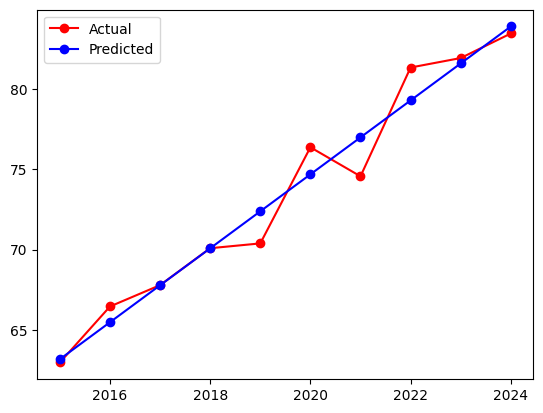

In [ ]:
import matplotlib.pyplot as plt
plt.plot(years,inrs,'ro-') #actual
plt.plot(years, model.predict(years.reshape(-1,1)),'bo-') #predicted
plt.legend(["Actual", "Predicted"])

In [ ]:
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnx

# Define the initial type & output type
initial_type = [('input', FloatTensorType([None, 1]))]
output_type = [('output', FloatTensorType([None, 1]))]

# Convert the model
onnx_model = convert_sklearn(model, initial_types=initial_type,final_types = output_type)

# Define meta data
metaData = onnx_model.metadata_props.add()
metaData.key = "range"
metaData.value = "Eg: 2015-2035"

# Save the model
with open("linear_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())